<a href="https://colab.research.google.com/github/azii22000/DeepLearning-01/blob/main/LRFinder_fasion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/Alireza-Akhavan/tf2-tutorial/raw/master/callbacks/learningratefinder.py

--2023-11-26 09:09:59--  https://github.com/Alireza-Akhavan/tf2-tutorial/raw/master/callbacks/learningratefinder.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py [following]
--2023-11-26 09:09:59--  https://raw.githubusercontent.com/Alireza-Akhavan/tf2-tutorial/master/callbacks/learningratefinder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5439 (5.3K) [text/plain]
Saving to: ‘learningratefinder.py’

learningratefinder. 100%[===================>]   5.31K  --.-KB/s    in 0s      

2023-11-26 09:09:59 (85.2 MB/s) - ‘learni

In [2]:
from learningratefinder import LearningRateFinder

In [6]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import os
import datetime



mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])


MIN_LR = 1e-5

model = create_model()
opt = tf.keras.optimizers.SGD(lr=MIN_LR, momentum=0.9)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Epoch 1/2
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3208 - accuracy: 0.1300
Epoch 2/2
1875/1875 [==============================] - 12s 6ms/step - loss: 1.8266 - accuracy: 0.5701


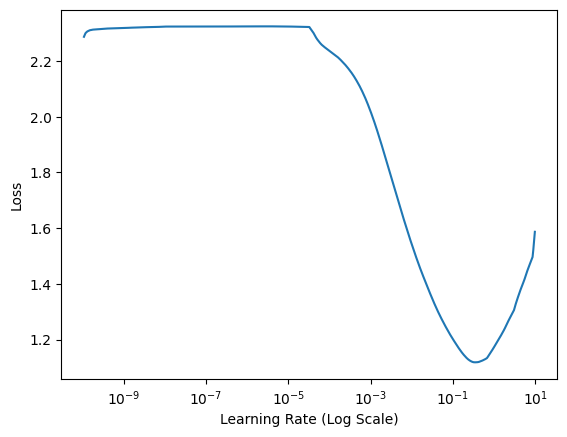

In [7]:
# initialize the learning rate finder and then train with learning
# rates ranging from 1e-10 to 1e+1
lrf = LearningRateFinder(model)
lrf.find((x_train, y_train),1e-10, 1e+1)
# plot the loss for the various learning rates and save the
# resulting plot to disk
lrf.plot_loss()